# Language Identification Machine Model
**by: Bukelwa Mqhamane** 

**20 November 2020**

**Explore Data Science Academy**

# Introduction

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

## Problem Stateme

Build a machine learning model that will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. 

# 0 Installations

# 1 Imports

# 1.1 Import Python Librariies

In [92]:
# Loading Data
import pandas as pd
import numpy as np
import nltk
import string
import re
import time

# Data Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.utils import resample
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer

# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score

# Model Evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
#from scikitplot.metrics import plot_roc, plot_confusion_matrix

# Explore Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib import style

import seaborn as sns

sns.set(font_scale=1.5)
style.use("seaborn-poster")

from wordcloud import WordCloud, STOPWORDS
from matplotlib.pyplot import rcParams

from sklearn.feature_extraction.text import CountVectorizer

# Import warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [93]:
#download libraries
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
sns.set_style('whitegrid')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bmqha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bmqha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [94]:

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bmqha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# 1.2 Import Data

In [95]:
train = pd.read_csv('data/train_set.csv')
test = pd.read_csv('data/test_set.csv') 

# 2. Exploratory Data Analysis (EDA)

In [4]:
train_copy = train.copy()
test_copy = test.copy()

In [5]:
train_copy.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [6]:
test_copy.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


## 2.1 Data Overview

In [7]:
train_copy.shape

(33000, 2)

In [8]:
test_copy.shape

(5682, 2)

In [12]:
test_copy.isnull().sum()

index    0
text     0
dtype: int64

In [14]:
train_copy.isnull().sum()

lang_id    0
text       0
dtype: int64

# 2.2 Class Distribution

In [16]:
value_counts = train["lang_id"].value_counts()
value_counts.name = "Raw Number"

value_normd = train["lang_id"].value_counts(normalize=True)
value_normd.name = "Percentage"

display(pd.concat([value_counts, value_normd], axis=1))


,Raw Number,Percentage
nbl,3000,0.090909
sot,3000,0.090909
eng,3000,0.090909
ssw,3000,0.090909
nso,3000,0.090909
ven,3000,0.090909
tsn,3000,0.090909
tso,3000,0.090909
xho,3000,0.090909
afr,3000,0.090909


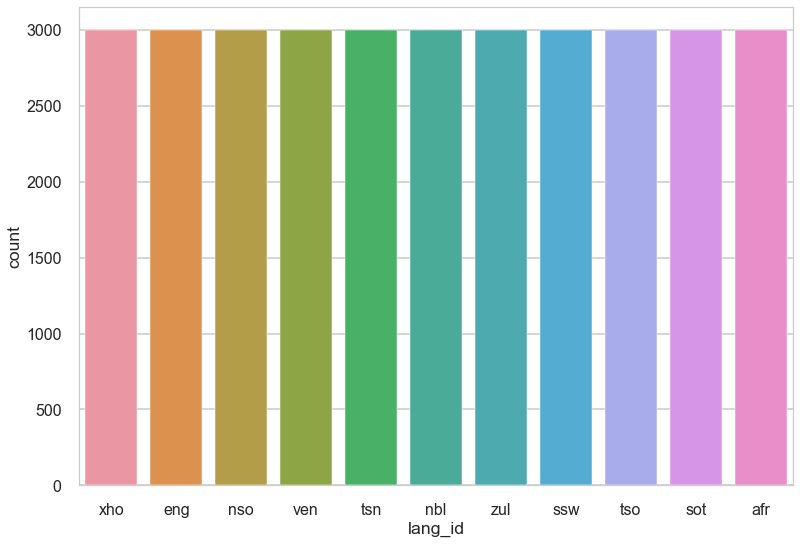

In [26]:
sns.countplot(train["lang_id"])
plt.show()

The data among classes is balance.

## 2.2 An overview of text statistics

In [30]:
train_copy.describe()

,lang_id,text
count,33000,33000
unique,11,29948
top,nbl,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


In [32]:
test_copy.text.describe()

count                                           5682
unique                                          5459
top       Wat gebeur as die Ouers ander Kinders het?
freq                                               6
Name: text, dtype: object

In [33]:
#description of the data per lang_id class
train_copy[['lang_id','text']].groupby('lang_id').describe()

text                                                               
        count unique                                                top freq
lang_id                                                                     
afr      3000   2641  openbare betrekkinge ob - die proses waardeur ...    5
eng      3000   2998  provincial revenue includes budgeted equitable...    2
nbl      3000   2362  ngokwesekhtjheni yomthetho ophathelene nalokhu...   17
nso      3000   2873  go tloga ka aprele ngwaga o twatši e ile ya pa...    4
sot      3000   2833  tip-offs anonymous ke tshebeletso ya mohala wa...    6
ssw      3000   2426  lesifo sisabalala ngematfonsi ematse k k uma n...    5
tsn      3000   2869  diforomo tsa kopo di ka tsewa gongwe go isiwa ...    9
tso      3000   2758  ku ya hi xiyenge xa xa nawu u ni mfanelo yo ko...   10
ven      3000   2605  vhabebi vhanu vha tea u ṋekana nga vhuṱanzi ha...    8
xho      3000   2659  ukuthintelwa kweempawu ezibonisa ukungalungi k...    6
zul      3000   2924  i-tip-offs anonymous wusizo locingo oluzimele ...    5

## 2.3 Text length distribution

In [36]:
train_copy['length'] = train_copy['text'].apply(len)
train_copy.head()

,lang_id,text,length
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,220
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,252
2,eng,the province of kwazulu-natal department of tr...,264
3,nso,o netefatša gore o ba file dilo ka moka tše le...,217
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,239


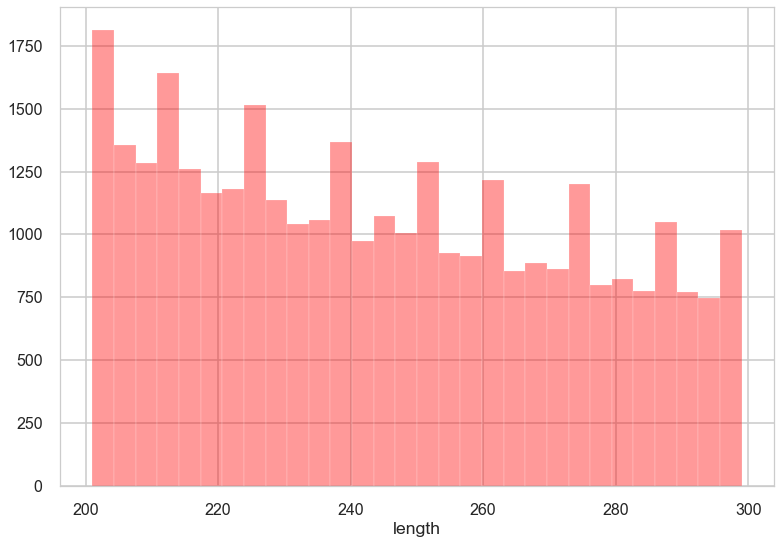

In [37]:
sns.distplot(train_copy['length'],bins=30,kde=False,color='red')

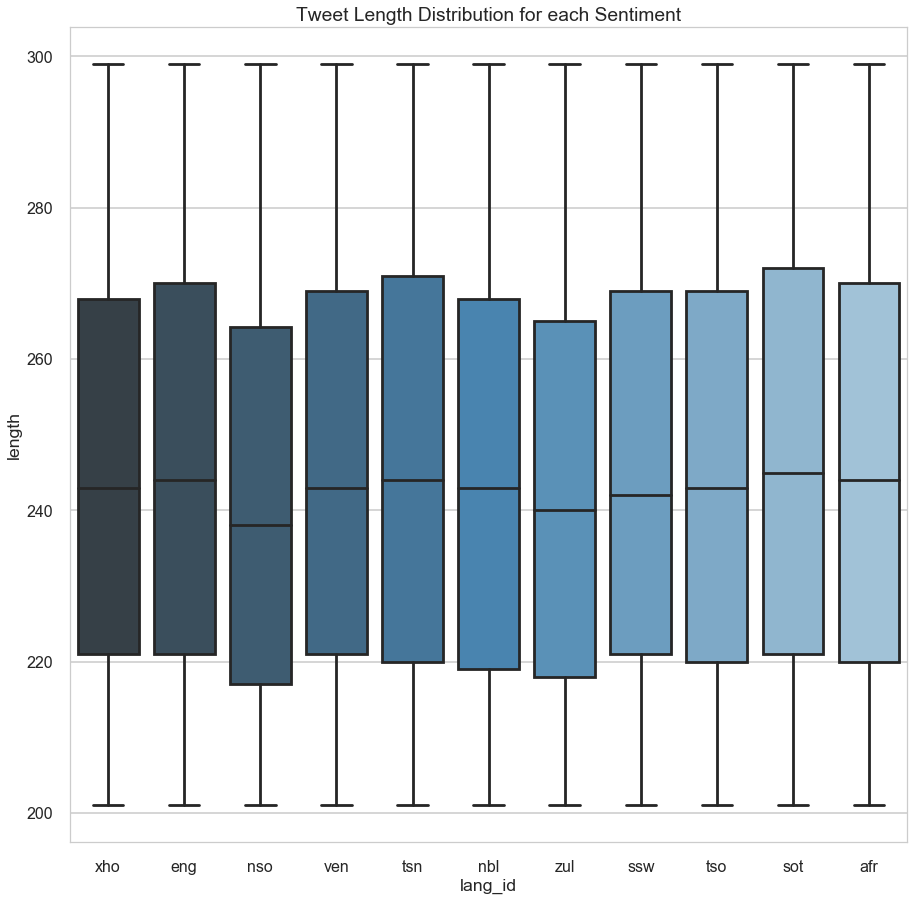

In [38]:
plt.figure(figsize=(15, 15))
sns.boxplot(x="lang_id", y="length", data=train_copy, palette=("Blues_d"))
plt.title("Text Length Distribution for each Language")
plt.show()

The distribution of length of text in all classes is summetric. No outliers were identified.

# 3. Data Preprocessing

**Techniques that we are going to use to clean our data**

- Removing Noise
- Stop Words
- Tokenisation
- Lemmatisation
- Speach tagging

## 3.1 Removing Noise

Noise will be removed with the following steps.

- Convert letters to lowercases
- Remove punctuation
- remove numbers

In [54]:
def cleaner(text):
    """
    this function takes in a text and perform the following:
    -Convert letters to lowercases
    -remove -numbers
    -remove punctuation
    from the text field then return a clean text 
    """
    text = text.lower()
    to_del = [
        r"\d+",  # delete numeric values
        r"U+FFFD",  # remove the "character note present" diamond
    ]
    for key in to_del:
        text = re.sub(key, "", text)
    
    # strip punctuation and special characters
    text = re.sub(r"[,.;':@#?!\&/$]+\ *", " ", text)
    # strip excess white-space
    text = re.sub(r"\s\s+", " ", text)
    
    return text.lstrip(" ")

In [55]:
train_copy['text'] = train_copy['text'].apply(cleaner)

In [56]:
train_copy.tail(5)

,lang_id,text,length
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...,272
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...,298
32997,eng,closing date for the submission of completed t...,222
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...,228
32999,sot,mafapha a mang le ona a lokela ho etsa ditlale...,204


In [111]:
stop_word = stopwords.words('english')
train_copy['message'] = train_copy['message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_word)]))

KeyError: 'message'

### 3.2 Text Normalization

In [108]:
def lemmatizer(df):
    import nltk
    nltk.download('wordnet')
    df["length"] = df["text"].str.len()
    df["tokenized"] = df["text"].apply(word_tokenize)
    df["parts-of-speech"] = df["tokenized"].apply(nltk.tag.pos_tag)
    
    def str2wordnet(tag):
        conversion = {"J": wordnet.ADJ, "V": wordnet.VERB, "N": wordnet.NOUN, "R": wordnet.ADV}
        try:
            return conversion[tag[0].upper()]
        except KeyError:
            return wordnet.NOUN
    
    wnl = WordNetLemmatizer()
    df["parts-of-speech"] = df["parts-of-speech"].apply(
        lambda tokens: [(word, str2wordnet(tag)) for word, tag in tokens]
    )
    df["lemmatized"] = df["parts-of-speech"].apply(
        lambda tokens: [wnl.lemmatize(word, tag) for word, tag in tokens]
    )
    df["lemmatized"] = df["lemmatized"].apply(lambda tokens: " ".join(map(str, tokens)))
    
    return df

In [109]:
train_copy = lemmatizer(train_copy)
train_copy.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bmqha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


NameError: name 'wordnet' is not defined

# 4. Feature Extraction

# 4.1 Splitting out the X variable from the target

In [96]:
ftrain = train.copy()

In [97]:
y = ftrain['lang_id']
X = ftrain['text']

# 4.2 Data tranformation with TfidfVectorizer


In [98]:
vectorizer = TfidfVectorizer(sublinear_tf=True, smooth_idf = True, max_df = 0.3, min_df = 3, ngram_range = (1, 3))
X_vectorized = vectorizer.fit_transform(X)


# 5. Modeling

## 5.1 Splitting the training data into a training and validation set

In [100]:
X_train,X_val,y_train,y_val = train_test_split(X_vectorized,y,test_size=.2,shuffle=True, stratify=y, random_state=42)

## 5.2 Model Fitting and Evaluation

### 5.2.1 Logistic Classifier

In [88]:

logreg = LogisticRegression(C=10, multi_class='ovr', solver='saga', random_state=42, max_iter=10)
logreg.fit(X_train, y_train)
y_pred_lg = logreg.predict(X_val)
report = classification_report(y_val, y_pred_lg, output_dict=True)
results = pd.DataFrame(report).transpose()
results

C:\Users\bmqha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bmqha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bmqha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bmqha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bmqha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

,precision,recall,f1-score,support
afr,1.000000,1.000000,1.000000,600.000000
eng,0.995025,1.000000,0.997506,600.000000
nbl,0.994983,0.991667,0.993322,600.000000
nso,1.000000,0.996667,0.998331,600.000000
sot,0.996678,1.000000,0.998336,600.000000
ssw,1.000000,1.000000,1.000000,600.000000
tsn,0.998333,0.998333,0.998333,600.000000
tso,1.000000,1.000000,1.000000,600.000000
ven,1.000000,1.000000,1.000000,600.000000
xho,0.990033,0.993333,0.991681,600.000000


### 5.2.2 Random Forest Classifier

In [89]:
modelstart = time.time()
rf = RandomForestClassifier(max_features=4, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
report = classification_report(y_val, y_pred_rf, output_dict=True)
results = pd.DataFrame(report).transpose()
results

,precision,recall,f1-score,support
afr,1.000000,1.000000,1.000000,600.000000
eng,0.993377,1.000000,0.996678,600.000000
nbl,0.993277,0.985000,0.989121,600.000000
nso,1.000000,0.998333,0.999166,600.000000
sot,0.998336,1.000000,0.999167,600.000000
ssw,0.996678,1.000000,0.998336,600.000000
tsn,1.000000,1.000000,1.000000,600.000000
tso,1.000000,1.000000,1.000000,600.000000
ven,1.000000,1.000000,1.000000,600.000000
xho,0.994958,0.986667,0.990795,600.000000


### 5.2.3 Decision Tree Classifier

In [90]:
dt = DecisionTreeClassifier(random_state=42 )    
dt.fit(X_train, y_train)
y_pred_dc = dt.predict(X_val)
report = classification_report(y_val, y_pred_dc, output_dict=True)
results = pd.DataFrame(report).transpose()
results

,precision,recall,f1-score,support
afr,0.990083,0.998333,0.994191,600.000000
eng,0.988411,0.995000,0.991694,600.000000
nbl,0.911612,0.876667,0.893798,600.000000
nso,0.991349,0.955000,0.972835,600.000000
sot,0.980100,0.985000,0.982544,600.000000
ssw,0.874214,0.926667,0.899676,600.000000
tsn,0.957586,0.978333,0.967848,600.000000
tso,0.994958,0.986667,0.990795,600.000000
ven,0.989983,0.988333,0.989158,600.000000
xho,0.921466,0.880000,0.900256,600.000000


### 5.2.4 Support vector machine Classifier

In [91]:
modelstart = time.time()
svc = SVC(gamma = 0.8, C = 10, random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_val)
report = classification_report(y_val, y_pred_svc, output_dict=True)
results = pd.DataFrame(report).transpose()
results

KeyboardInterrupt: 

### 5.2.5 Linear SVC

In [76]:
modelstart = time.time() 
linsvc = LinearSVC()
linsvc.fit(X_train, y_train)
y_pred_lsvc = linsvc.predict(X_val)
report = classification_report(y_val, y_pred_lsvc, output_dict=True)
results = pd.DataFrame(report).transpose()
results

Accuracy 0.9972727272727273
Model Runtime: 2.78 seconds


,precision,recall,f1-score,support
afr,1.000000,1.000000,1.000000,300.000000
eng,0.993377,1.000000,0.996678,300.000000
nbl,0.993311,0.990000,0.991653,300.000000
nso,1.000000,0.996667,0.998331,300.000000
sot,0.996678,1.000000,0.998336,300.000000
ssw,1.000000,1.000000,1.000000,300.000000
tsn,0.996667,0.996667,0.996667,300.000000
tso,1.000000,1.000000,1.000000,300.000000
ven,1.000000,1.000000,1.000000,300.000000
xho,1.000000,0.993333,0.996656,300.000000


# 6. Model Analysis

# 6.1 F1 score evaluation

In [ ]:
# Logistc regression F1 score

logreg_f1 = round(f1_score(y_val, y_pred_lg, average='weighted'),4)

# Random forest F1 score
rf_f1 = round(f1_score(y_val, y_pred_rf, average='weighted'),4)

# Decision tree F1 score
dt_f1 = round(f1_score(y_val, y_pred_dc, average='weighted'),4)

# Support Vector F1 score
svc_f1 = round(f1_score(y_val, y_pred_svc, average='weighted'),4)

# Linear Support Vector F1 score
linsvc_f1 = round(f1_score(y_val, y_pred_lsvc, average='weighted'),4)

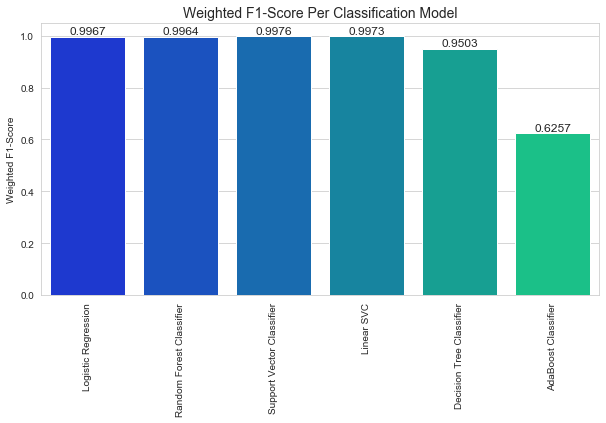

In [77]:
fig,axis = plt.subplots(figsize=(10, 5))
rmse_x = ['Logistic Regression','Random Forest Classifier','Support Vector Classifier','Linear SVC','Decision Tree Classifier','AdaBoost Classifier']
rmse_y = [logreg_f1,rf_f1,svc_f1,linsvc_f1,dt_f1,ad_f1]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette='winter')
plt.title('Weighted F1-Score Per Classification Model',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Weighted F1-Score')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),4), fontsize=12, ha="center", va='bottom')
    
plt.show()

# 7. Model OPtimazation

### 7.1 Linear regression

In [84]:
Cs =  [1, 10]
gammas = [0.001, 0.01, 0.1, 1]

param_grid =  {'multi_class': ['ovr'],
              'random_state': [42],
              'solver': ['saga'], 
               'C': [100], 
               'max_iter': [10]
              }
    
#grid_SVM = GridSearchCV(SVC(), param_grid, scoring='f1', cv=nfolds)
#grid_SVM.fit(X_train, y_train)

grid_LR = GridSearchCV(LogisticRegression(), param_grid, scoring='f1_weighted', cv=3, n_jobs=-1)
grid_LR.fit(X_train, y_train)
y_pred = grid_LR.predict(X_val)
print(classification_report(y_val, y_pred))

C:\Users\bmqha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bmqha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bmqha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bmqha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bmqha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

Best parameters:
{'C': 1000, 'max_iter': 10, 'multi_class': 'ovr', 'random_state': 42, 'solver': 'saga'}
accuracy 0.9960606060606061
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       300
         eng       0.99      1.00      1.00       300
         nbl       0.99      0.99      0.99       300
         nso       1.00      1.00      1.00       300
         sot       1.00      1.00      1.00       300
         ssw       1.00      1.00      1.00       300
         tsn       1.00      1.00      1.00       300
         tso       1.00      1.00      1.00       300
         ven       1.00      1.00      1.00       300
         xho       1.00      0.99      0.99       300
         zul       0.98      0.99      0.99       300

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



### 7.2 Support Vector Classifier

In [86]:
param_grid = {'C': [10],#[0.1,1,10,100,1000]
              'gamma': [0.8], #[0.8,1]
              'kernel': ['rbf'], #['linear','rbf']
              'random_state': [42]} 
grid_SVC = GridSearchCV(SVC(), param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_SVC.fit(X_train, y_train)
y_pred_svt = grid_SVC.predict(X_val)
print(classification_report(y_val, y_pred_svt))

{'C': 10, 'gamma': 0.8, 'kernel': 'rbf', 'random_state': 42}
accuracy 0.9975757575757576
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       300
         eng       1.00      1.00      1.00       300
         nbl       0.99      0.99      0.99       300
         nso       1.00      0.99      1.00       300
         sot       1.00      1.00      1.00       300
         ssw       1.00      1.00      1.00       300
         tsn       1.00      1.00      1.00       300
         tso       1.00      1.00      1.00       300
         ven       1.00      1.00      1.00       300
         xho       1.00      1.00      1.00       300
         zul       0.99      0.99      0.99       300

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



### 7.3 Linear SVC

In [101]:
param_grid = {'C': [100],#[0.1,1,10,100,1000]
              'max_iter': [10], #[10,100]
              'multi_class' : ['ovr'], #['crammer_singer', 'ovr']
              'random_state': [42]} 
grid_LSVC = GridSearchCV(LinearSVC(), param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_LSVC.fit(X_train, y_train)
y_pred_lsvt = grid_LSVC.predict(X_val)
print(classification_report(y_val, y_pred_lsvt))

C:\Users\bmqha\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       600
         eng       1.00      1.00      1.00       600
         nbl       1.00      1.00      1.00       600
         nso       1.00      1.00      1.00       600
         sot       1.00      1.00      1.00       600
         ssw       1.00      1.00      1.00       600
         tsn       1.00      1.00      1.00       600
         tso       1.00      1.00      1.00       600
         ven       1.00      1.00      1.00       600
         xho       0.99      0.99      0.99       600
         zul       0.99      0.99      0.99       600

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



# 7.2 Model evaluation using test data

## 7.2.1 Data tranformation with Vectorizer

In [103]:
testx = test_copy['text']
test_vect = vectorizer.transform(testx)

In [66]:
# Random Forest
rfc_pred_t = rf.predict(test_vect)
# Multi-class Logistic Predict
lmc_pred_t = logreg.predict(test_vect)
#Decision Tree Predict
dtc_pred_t = dt.predict(test_vect)
# Support vector Machine Predict
svc_pred_t = grid_SVC.predict(test_vect)
# Linear support vector Machine Predict
linsvc_pred = grid_LSVC.predict(test_vect)
# AdaBoost Predict
ad_pred = ad.predict(test_vect)

In [104]:
linsvc_pred = grid_LSVC.predict(test_vect)

# 8. Submitions

In [106]:
test['lang_id'] =linsvc_pred
test.head()

,index,text,lang_id
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",tsn
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,nbl
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,ven
3,4,Kube inja nelikati betingevakala kutsi titsini...,ssw
4,5,Winste op buitelandse valuta.,afr


In [107]:
test[['index','lang_id']].to_csv('testsubmission.csv', index=False)

# 9. Conclusion

All models that were trained performanced well with an accuracy of over 93%. 